<a href="https://colab.research.google.com/github/NAMHUBB/Nam/blob/main/251127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))
# GPU check

TensorFlow version: 2.19.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 0~255 → 0~1로 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 간단한 신경망 모델 정의
# Dense Layer를 이용한 기본적인 분류 모델

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.fit(x_train, y_train, epochs=3)
# 모델 학습


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8751 - loss: 0.4363
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9639 - loss: 0.1195
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0787


In [6]:
model.evaluate(x_test, y_test, verbose=2)
# 테스트 데이터로 평가

313/313 - 2s - 5ms/step - accuracy: 0.9739 - loss: 0.0811


[0.0811278447508812, 0.9739000201225281]

In [5]:
import numpy as np

# 테스트셋 첫 이미지 예측
img = x_test[0]
prediction = model.predict(img.reshape(1, 28, 28))

print("예측:", np.argmax(prediction))
print("실제 정답:", y_test[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
예측: 7
실제 정답: 7


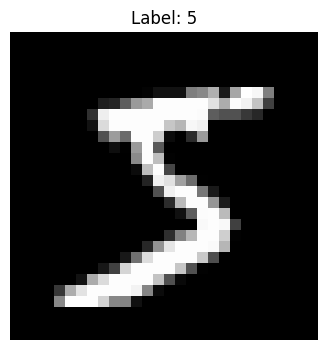

In [7]:
# MNIST 이미지 시각화 (Matplotlib)

import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 첫 번째 이미지 선택
image = x_train[0]
label = y_train[0]

plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')  # 흑백 이미지 표시
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()




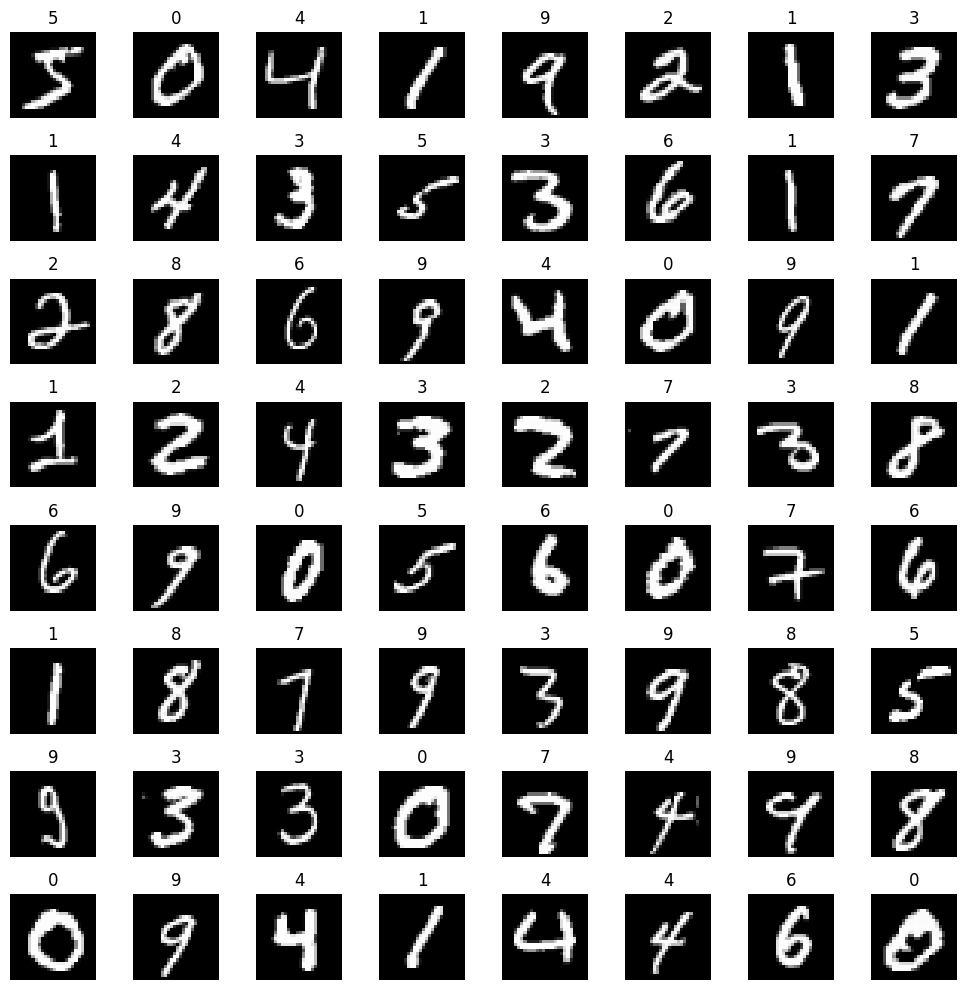

In [8]:
# 여러 장을 한 번에 시각화

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [9]:
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("픽셀 값 범위:", x_train.min(), "~", x_train.max())


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
픽셀 값 범위: 0 ~ 255


In [10]:
# MNIST 불러오기 + CNN용 reshape

import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# CNN 입력 형태로 reshape
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

print("변환 전:", x_train.shape)       # (60000, 28, 28)
print("변환 후:", x_train_cnn.shape)  # (60000, 28, 28, 1)


변환 전: (60000, 28, 28)
변환 후: (60000, 28, 28, 1)


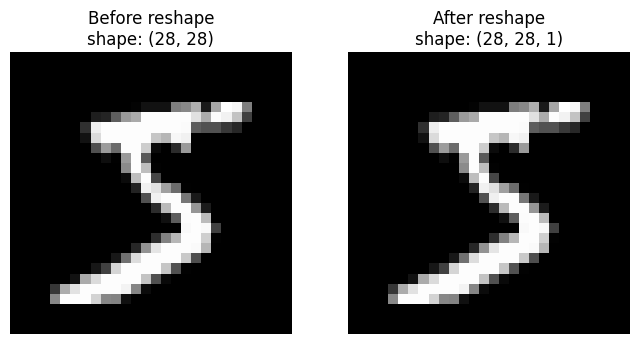

In [11]:
# reshape 전/후 이미지 시각적 비교

import numpy as np
plt.figure(figsize=(8,4))

# 원본
plt.subplot(1,2,1)
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Before reshape\nshape: {x_train[0].shape}")
plt.axis('off')

# reshape 후 (채널 1 추가)
plt.subplot(1,2,2)
plt.imshow(x_train_cnn[0].reshape(28,28), cmap='gray')
plt.title(f"After reshape\nshape: {x_train_cnn[0].shape}")
plt.axis('off')

plt.show()


In [12]:
# reshape 후 실제 내부 데이터 구조 확인

print("한 이미지의 원본 shape:", x_train[0].shape)
print("한 이미지의 CNN shape:", x_train_cnn[0].shape)
print("CNN 이미지 한 픽셀 값:", x_train_cnn[0][14][14][0])


한 이미지의 원본 shape: (28, 28)
한 이미지의 CNN shape: (28, 28, 1)
CNN 이미지 한 픽셀 값: 240
